In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from tqdm import tqdm
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [4]:
labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
          5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

In [5]:
train, val = train_test_split(train, test_size=10000, random_state=42, stratify=train['label'])

In [6]:
x_train, y_train = train.drop('label', axis=1) / 255, train['label']
x_val, y_val = val.drop('label', axis=1) / 255, val['label']
x_test, y_test = test.drop('label', axis=1) / 255, test['label']

### Applying PCA to the training portion of the dataset.

In [7]:
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train)

#### Number of components required to preserve 95% of the variance is shown below -

In [8]:
pca.n_components_

187

In [9]:
sum(pca.explained_variance_ratio_)

0.950086473840289

### Training a Random Forest classifier on the reduced dataset and evaluating it on the test dataset.

In [10]:
rf_clf = RandomForestClassifier(n_estimators=200, oob_score=True, n_jobs=-1, random_state=420)

In [15]:
rf_clf.fit(x_train_pca, y_train)
print('OOB score: ', rf_clf.oob_score_)

OOB score:  0.86128


In [16]:
x_val_pca = pca.transform(x_val)
print('Validation set score: ', rf_clf.score(x_val_pca, y_val))

Validation set score:  0.8607


#### Evaluating the trained classifier on the test set

In [17]:
x_test_pca = pca.transform(x_test)
print('Test set score: ', rf_clf.score(x_test_pca, y_test))

Test set score:  0.8617


### Plotting 10 random images in the original form (without PCA) and dimensionally-reduced form (with PCA).

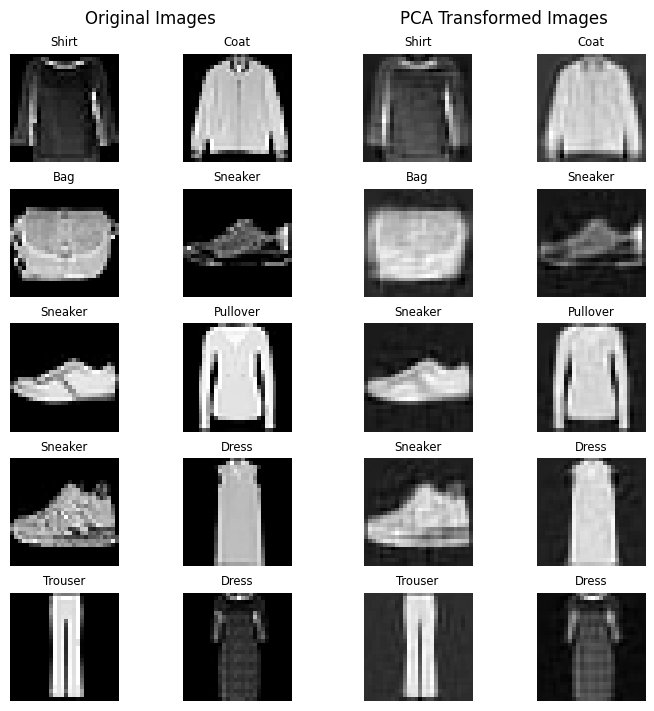

In [18]:
random_img_indices = np.random.randint(len(x_train), size=10)

fig = plt.figure(figsize=(7,7), constrained_layout=True)

subfigs = fig.subfigures(1, 2)

subfig = subfigs[0]
subfig.suptitle(f'Original Images')
axs = subfig.subplots(5, 2)
for innerind, ax in enumerate(axs.flat):
    ax.set_title(labels[y_train.iloc[random_img_indices[innerind]]], fontsize='small')
    ax.imshow(x_train.iloc[random_img_indices[innerind]].values.reshape(28,28), cmap="gray")
    ax.set_axis_off()

subfig = subfigs[1]
subfig.suptitle(f'PCA Transformed Images')
axs = subfig.subplots(5, 2)
for innerind, ax in enumerate(axs.flat):
    ax.set_title(labels[y_train.iloc[random_img_indices[innerind]]], fontsize='small')
    x_train_inv = pca.inverse_transform(x_train_pca[random_img_indices[innerind]])
    ax.imshow(x_train_inv.reshape(28,28), cmap="gray")
    ax.set_axis_off()

plt.show()

In [21]:
print('For first 2 principal components -')
print(f'Explained variance:       {pca.explained_variance_[:2]}')
print(f'Total explained variance: {sum(pca.explained_variance_[:2])}')
print(f'Explained variance ratio: {pca.explained_variance_ratio_[:2]}')
print(f'Total explained variance ratio: {sum(pca.explained_variance_ratio_[:2])}')

For first 2 principal components -
Explained variance:       [19.69101911 12.0680396 ]
Total explained variance: 31.75905871152768
Explained variance ratio: [0.28939372 0.1773608 ]
Total explained variance ratio: 0.46675451752982916


### Using various dimensionality reduction algorithms like PCA, t-SNE, LLE and MDS to reduce the data to only 2 dimensions.

In [22]:
indices = np.random.randint(len(x_train), size=1000)

In [25]:
def plot(x, y, indices, title):
    fig = plt.figure(figsize=(8,8))
    scatter = plt.scatter(x[indices][:,0], x[indices][:,1], c=y.iloc[indices], cmap='tab10', alpha=0.5)
    plt.title(title)
    plt.xlabel('1st Dimension')
    plt.ylabel('2nd Dimension')
    legend = plt.legend(*scatter.legend_elements(), )
    plt.tight_layout()
    plt.show()

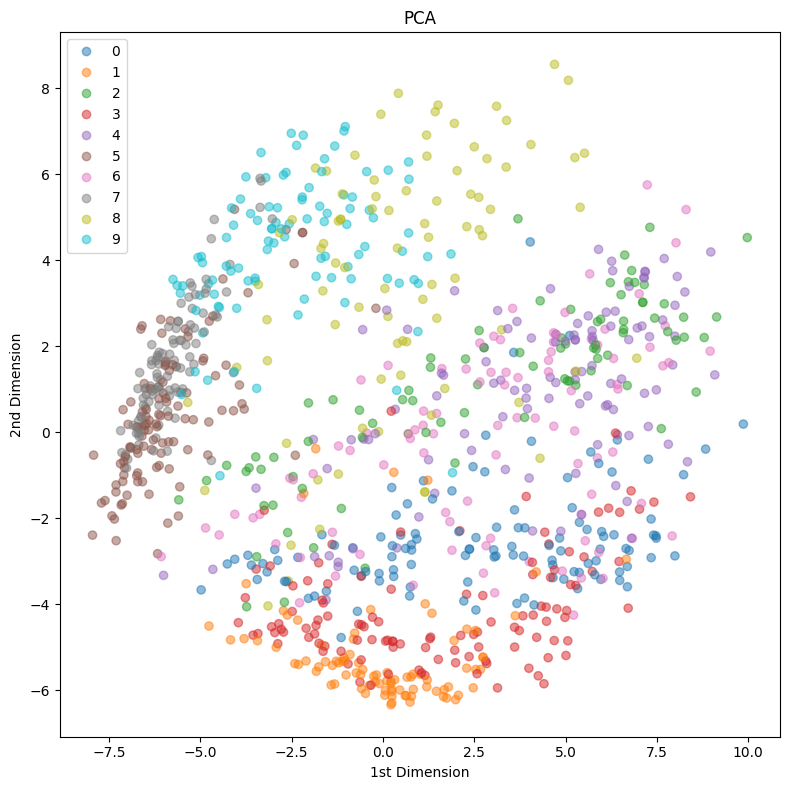

In [26]:
pca2d = PCA(n_components=2)
x_train_2d = pca2d.fit_transform(x_train)

plot(x_train_2d, y_train, indices, 'PCA')

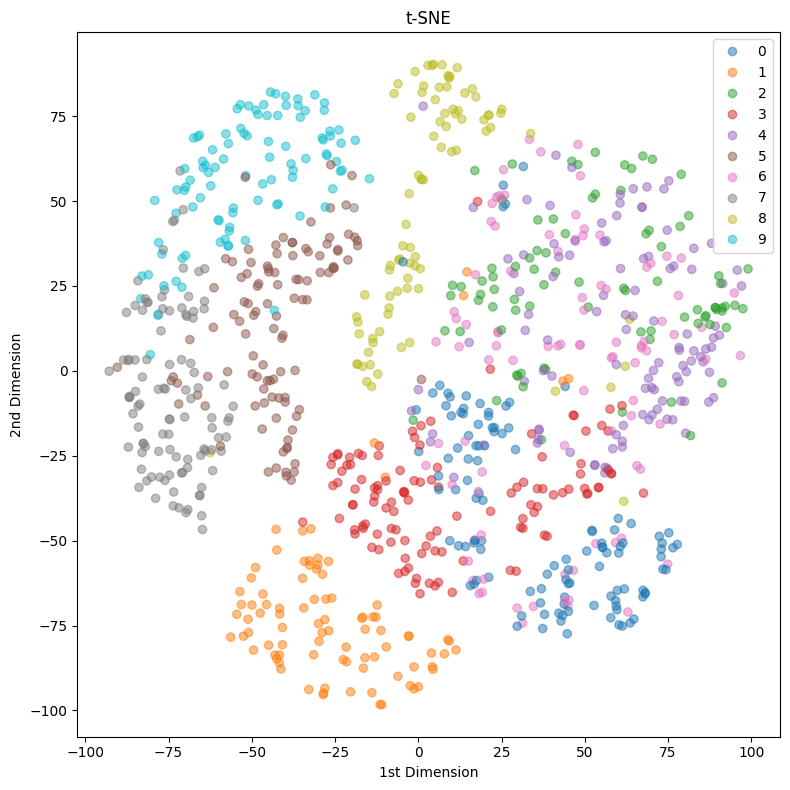

In [27]:
tsne = TSNE(n_components=2, n_jobs=-2)
x_train_tsne = tsne.fit_transform(x_train)

plot(x_train_tsne, y_train, indices, 't-SNE')

In [28]:
lle = LocallyLinearEmbedding(n_neighbors=6, n_components=2, n_jobs=-2, random_state=10)
x_train_lle_6 = lle.fit_transform(x_train)

In [29]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, n_jobs=-2, random_state=10)
x_train_lle_10 = lle.fit_transform(x_train)

In [30]:
lle = LocallyLinearEmbedding(n_neighbors=20, n_components=2, n_jobs=-2, random_state=10)
x_train_lle_20 = lle.fit_transform(x_train)

In [31]:
lle = LocallyLinearEmbedding(n_neighbors=30, n_components=2, n_jobs=-2, random_state=10)
x_train_lle_30 = lle.fit_transform(x_train)

In [32]:
lle = LocallyLinearEmbedding(n_neighbors=40, n_components=2, n_jobs=-2, random_state=10)
x_train_lle_40 = lle.fit_transform(x_train)

In [40]:
lle = LocallyLinearEmbedding(n_neighbors=50, n_components=2, n_jobs=-2, random_state=10)
x_train_lle_50 = lle.fit_transform(x_train)

In [ ]:
lle = LocallyLinearEmbedding(n_neighbors=60, n_components=2, n_jobs=-2, random_state=10)
x_train_lle_60 = lle.fit_transform(x_train)

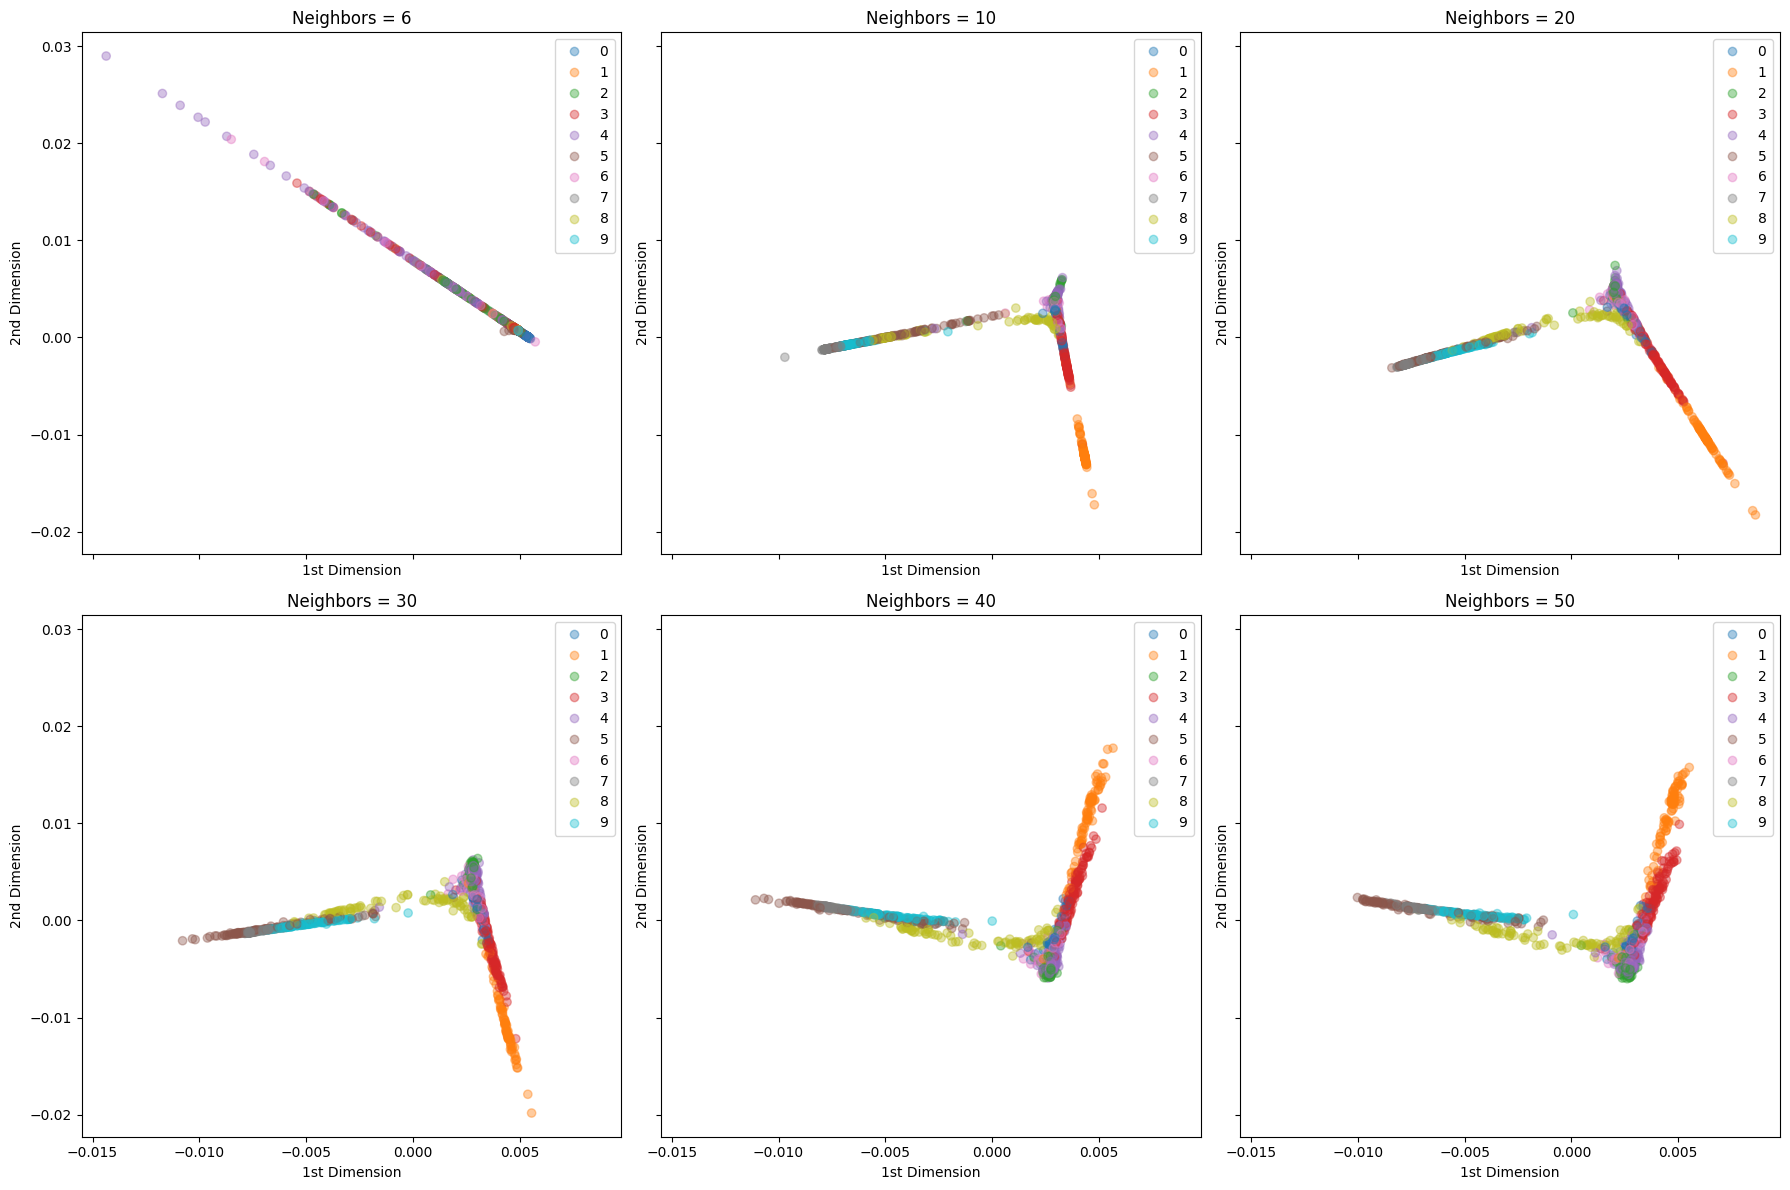

In [42]:
lle_knn = [x_train_lle_6, x_train_lle_10, x_train_lle_20, x_train_lle_30, x_train_lle_40, x_train_lle_50]
knn = [6, 10, 20, 30, 40, 50]

fig, axs = plt.subplots(2, 3, figsize=(18,12), sharex=True, sharey=True, squeeze=True)
ax = axs.reshape(-1)

for i in range(len(lle_knn)):
    scatter = ax[i].scatter(lle_knn[i][indices][:,0], lle_knn[i][indices][:,1], c=y_train.iloc[indices], 
                            cmap='tab10', alpha=0.4)
    ax[i].set_title(f'Neighbors = {knn[i]}')
    ax[i].set_xlabel('1st Dimension')
    ax[i].set_ylabel('2nd Dimension')
    legend = ax[i].legend(*scatter.legend_elements(), )

plt.tight_layout()
plt.show()

- From the above plots, we can say that increasing the number of nearest neighbors to perform LLE might give us a better visualization but then it also takes longer time with more nearest neighbors so we'll use the plot of 50 nearest neighbors to compare LLE with other dimensionality reduction techniques.

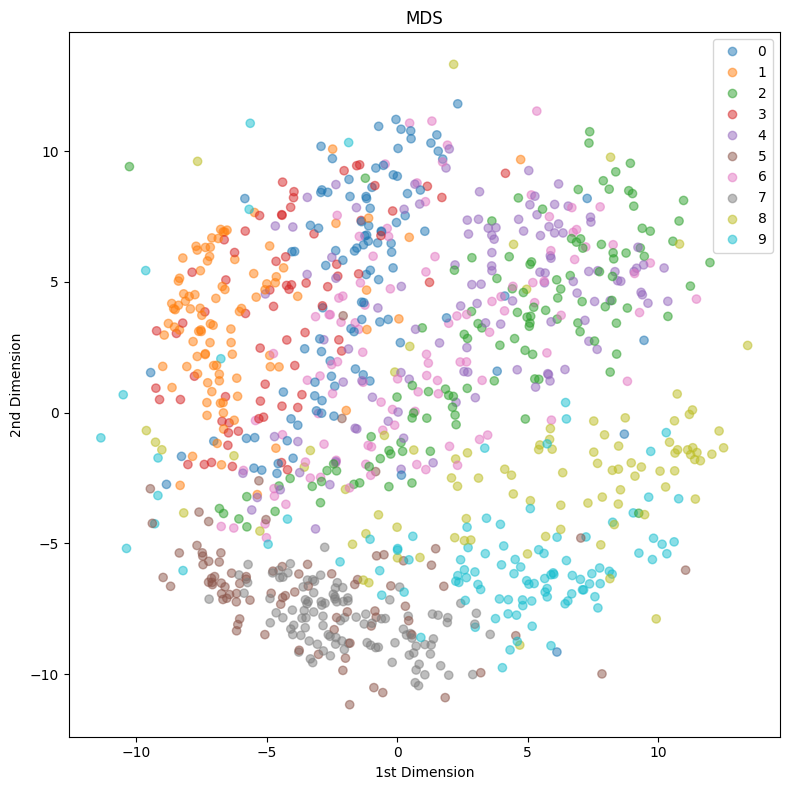

In [43]:
mds = MDS(n_components=2, n_init=4, max_iter=100, n_jobs=-2, random_state=10)
x_train_mds = mds.fit_transform(x_train[:5000])

plot(x_train_mds, y_train, range(1000), 'MDS')

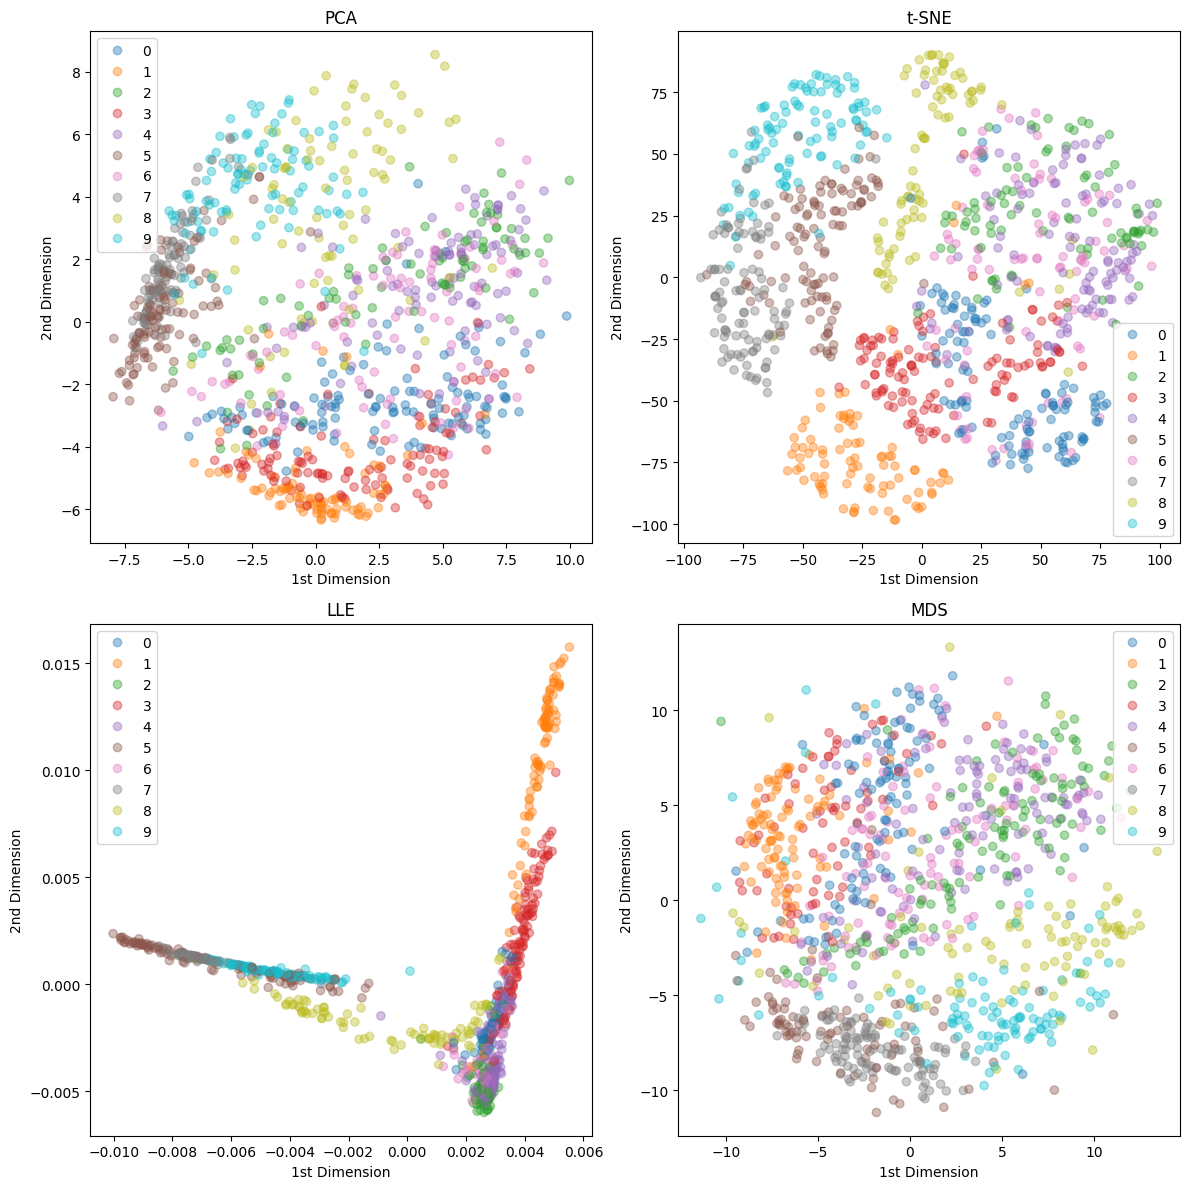

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(12,12), squeeze=True)
ax = axs.reshape(-1)

titles = ['PCA', 't-SNE', 'LLE', 'MDS']

x_reduced = [x_train_pca, x_train_tsne, x_train_lle_50, x_train_mds]

for i in range(len(x_reduced)):
    random_indices = indices if i < 3 else range(1000)
    scatter = ax[i].scatter(x_reduced[i][random_indices][:,0], x_reduced[i][random_indices][:,1], c=y_train.iloc[random_indices], 
                            cmap='tab10', alpha=0.4)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('1st Dimension')
    ax[i].set_ylabel('2nd Dimension')
    legend = ax[i].legend(*scatter.legend_elements(), )

plt.tight_layout()
plt.show()

#### The t-SNE plot can be preferred to get an idea about the clusters as this is the only plot where we can see the clusters separated by some space. In other plots, there's too much overlapping of clusters and it's hard to find all the points that belong to same cluster.

## K-Means Clustering

In [45]:
random_10000 = np.random.randint(len(x_train), size=10000)

In [46]:
x_rand = x_train.iloc[random_10000]
y_rand = y_train.iloc[random_10000]

In [47]:
pca = PCA(n_components=0.95)
x_rand_pca = pca.fit_transform(x_rand)

In [48]:
k = [i for i in range(4,16)]
kmeans_models = [KMeans(n_clusters=i, random_state=4200).fit(x_rand_pca) for i in k]
inertias = [km.inertia_ for km in kmeans_models]
silhouette_scores = [silhouette_score(x_rand_pca, km.labels_) for km in kmeans_models]
silhouette_score_per_instance = [silhouette_samples(x_rand_pca, km.labels_) for km in kmeans_models]

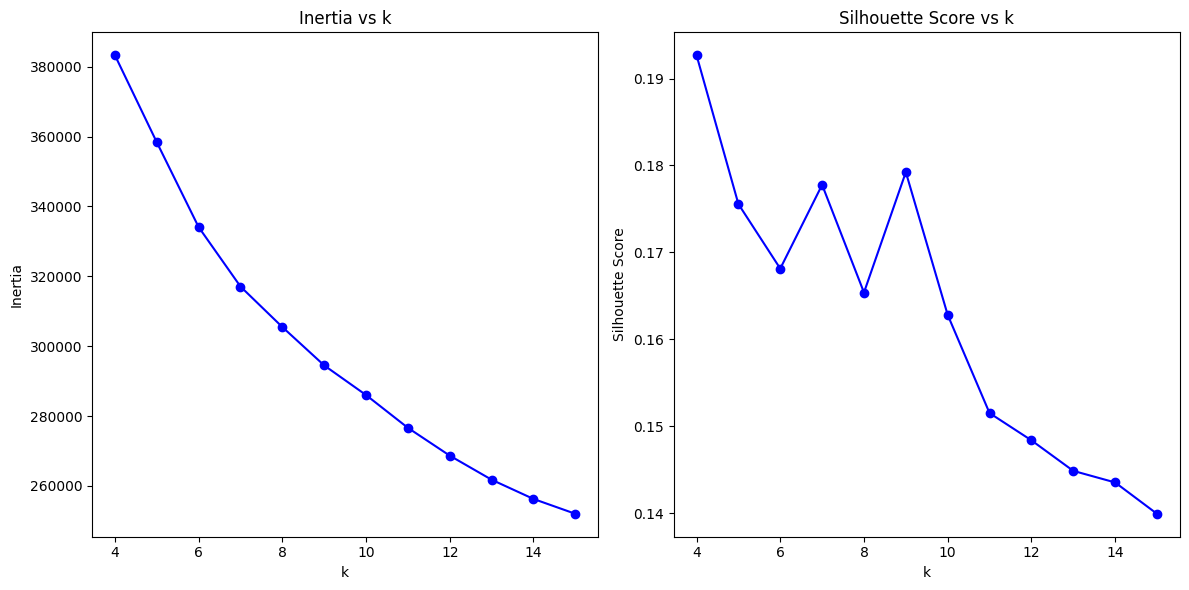

In [49]:
fig = plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(k, inertias, 'bo-')
plt.title(f'Inertia vs k')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(122)
plt.plot(k, silhouette_scores, 'bo-')
plt.title(f'Silhouette Score vs k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

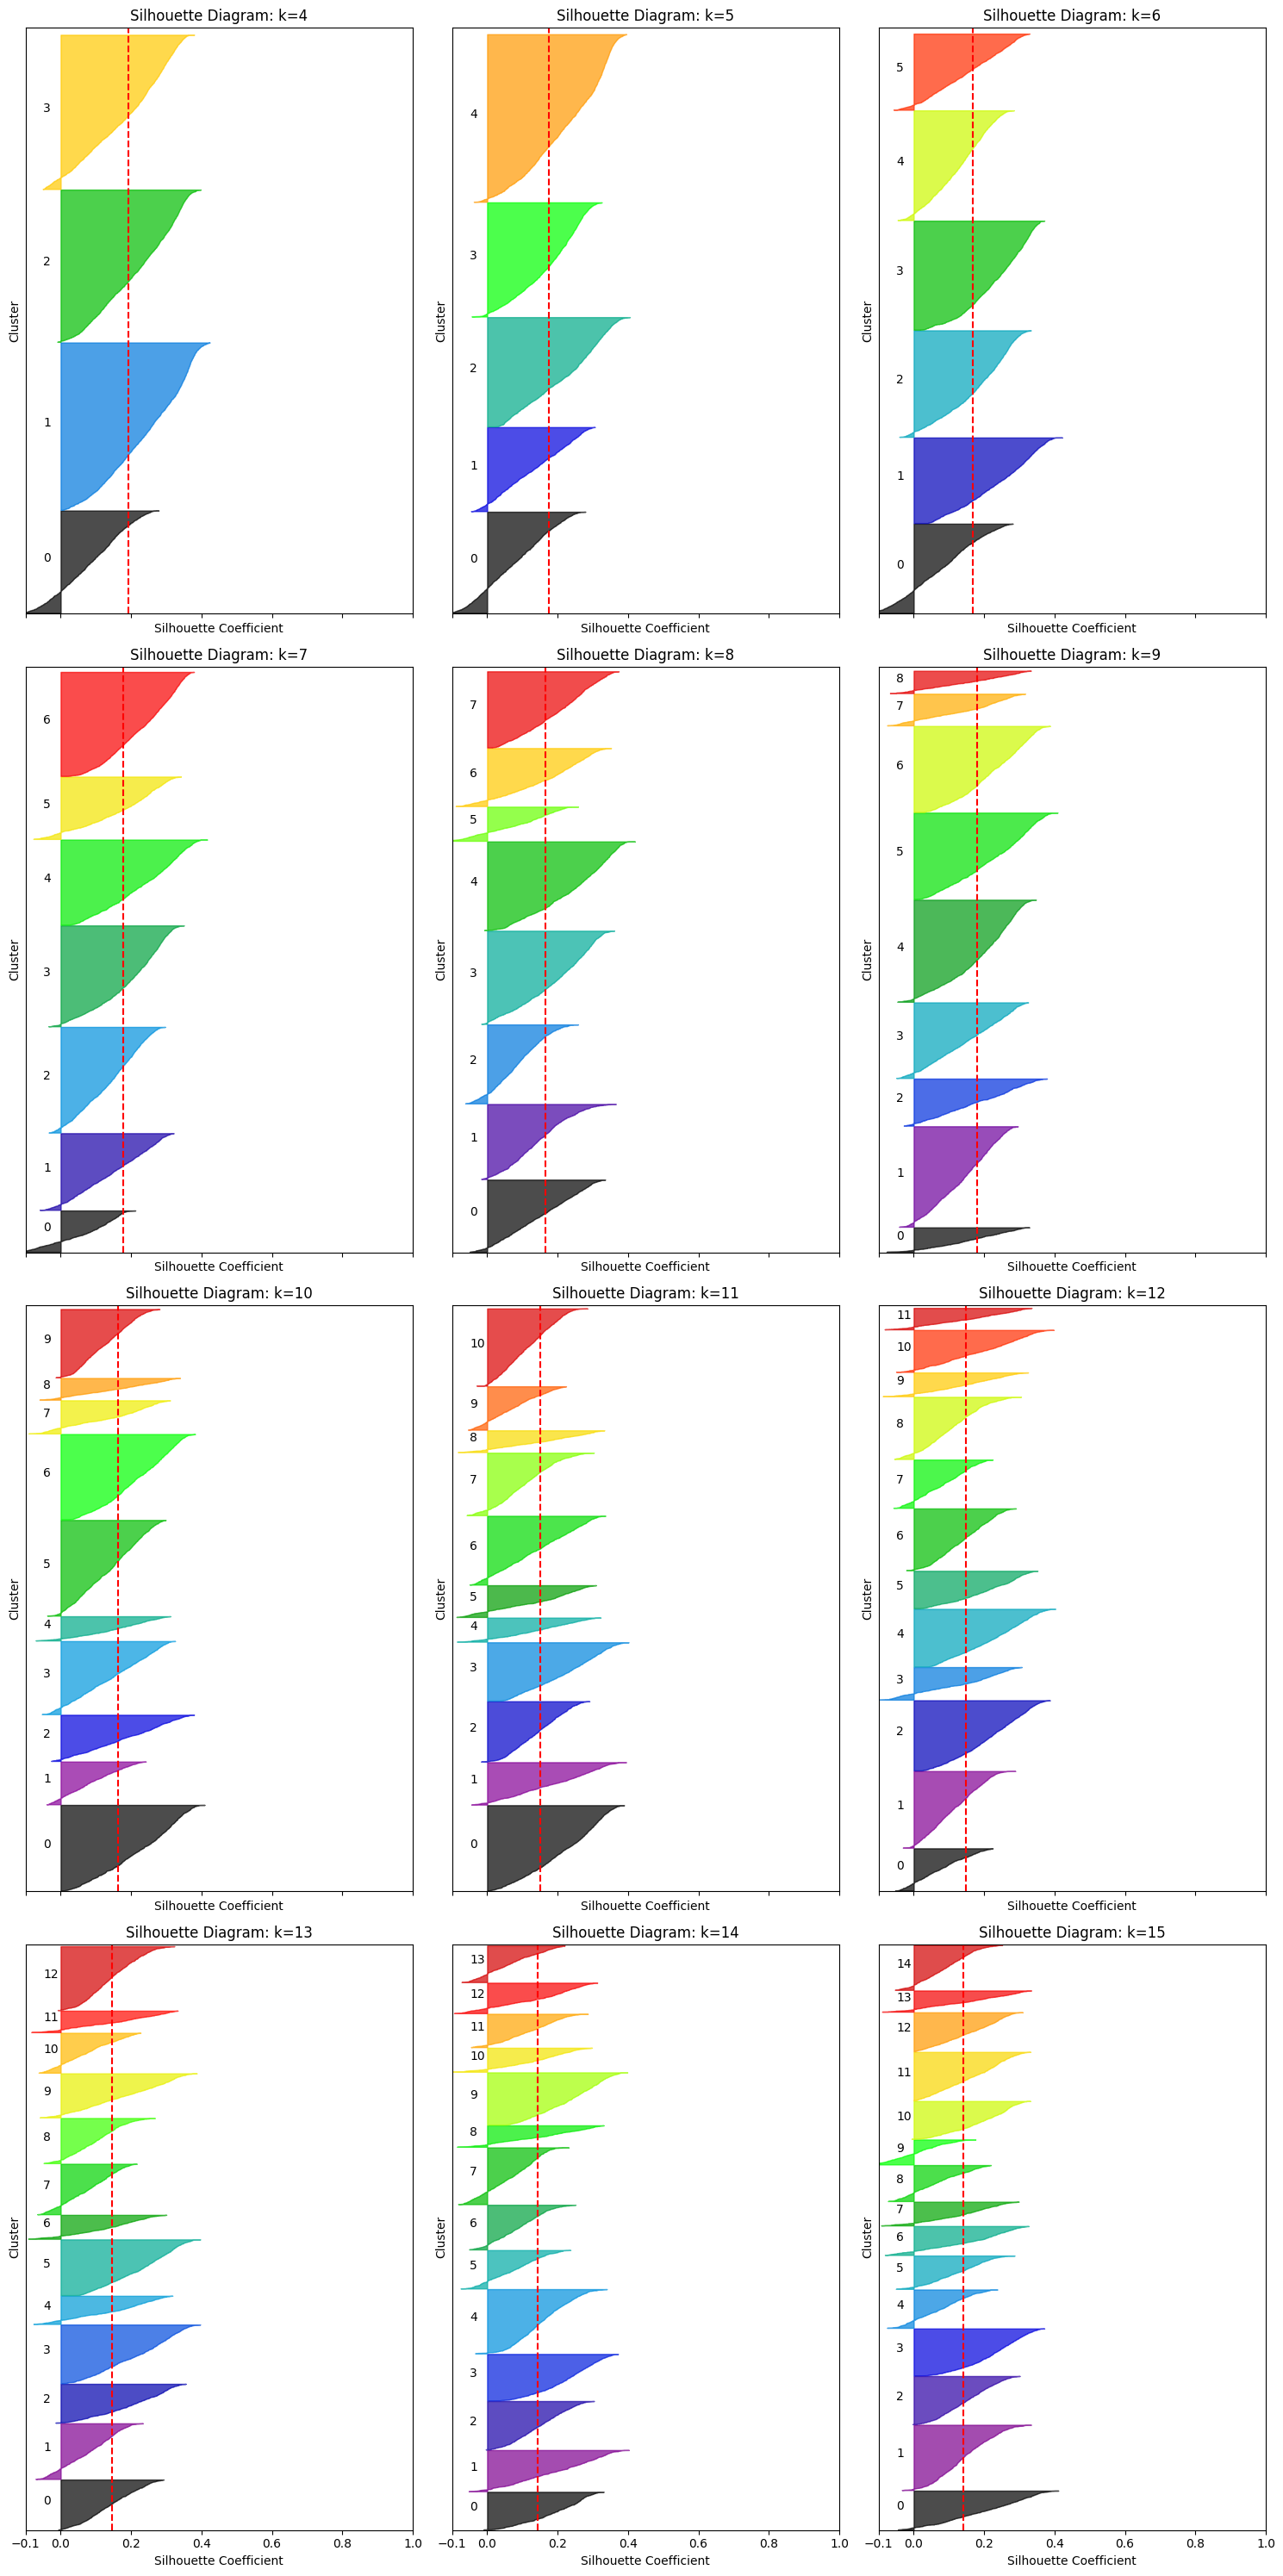

In [53]:
fig, axs = plt.subplots(4, 3, figsize=(15,30), sharex=True, sharey=True, squeeze=True)
ax = axs.reshape(-1)

for i in range(len(k)):
    ax[i].set_xlim([-0.1, 1])
    ax[i].set_ylim([0, len(x_rand_pca) + (k[i] + 1) * 10])

    silhouette_avg = silhouette_scores[i]

    y_lower = 10
    for j in range(k[i]):
        ith_cluster_silhouette_values = np.asarray(silhouette_score_per_instance[i])[kmeans_models[i].labels_ == j]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(j) / k[i])
        ax[i].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

        y_lower = y_upper + 10

    ax[i].set_title(f"Silhouette Diagram: k={k[i]}")
    ax[i].set_xlabel("Silhouette Coefficient")
    ax[i].set_ylabel("Cluster")

    ax[i].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax[i].set_yticks([])
    ax[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.tight_layout()
plt.show()

- #### From the above plots, we can see that inertia always decreases with increase in number of clusters(k) but the silhouette score shows some fluctuations.
- #### From the silhouette diagrams, for all values of k, all the clusters coefficient score passes the dashed vertical line(silhouette score for each number of clusters) and extend beyond this line.
- #### Also, even though the silhouette score is maximum for k = 4, but there is some fluctuation till k = 9 and after k = 10 only it starts monotonically decreasing. The silhouette diagram also reveals that for k = 10 most of the clusters are balanced(discrepancies can be due to less number of instances of that class) so we select k = 10.

In [54]:
kmeans = kmeans_models[6]
x_val_pca = pca.transform(x_val)
y_val_pred = kmeans.predict(x_val_pca)

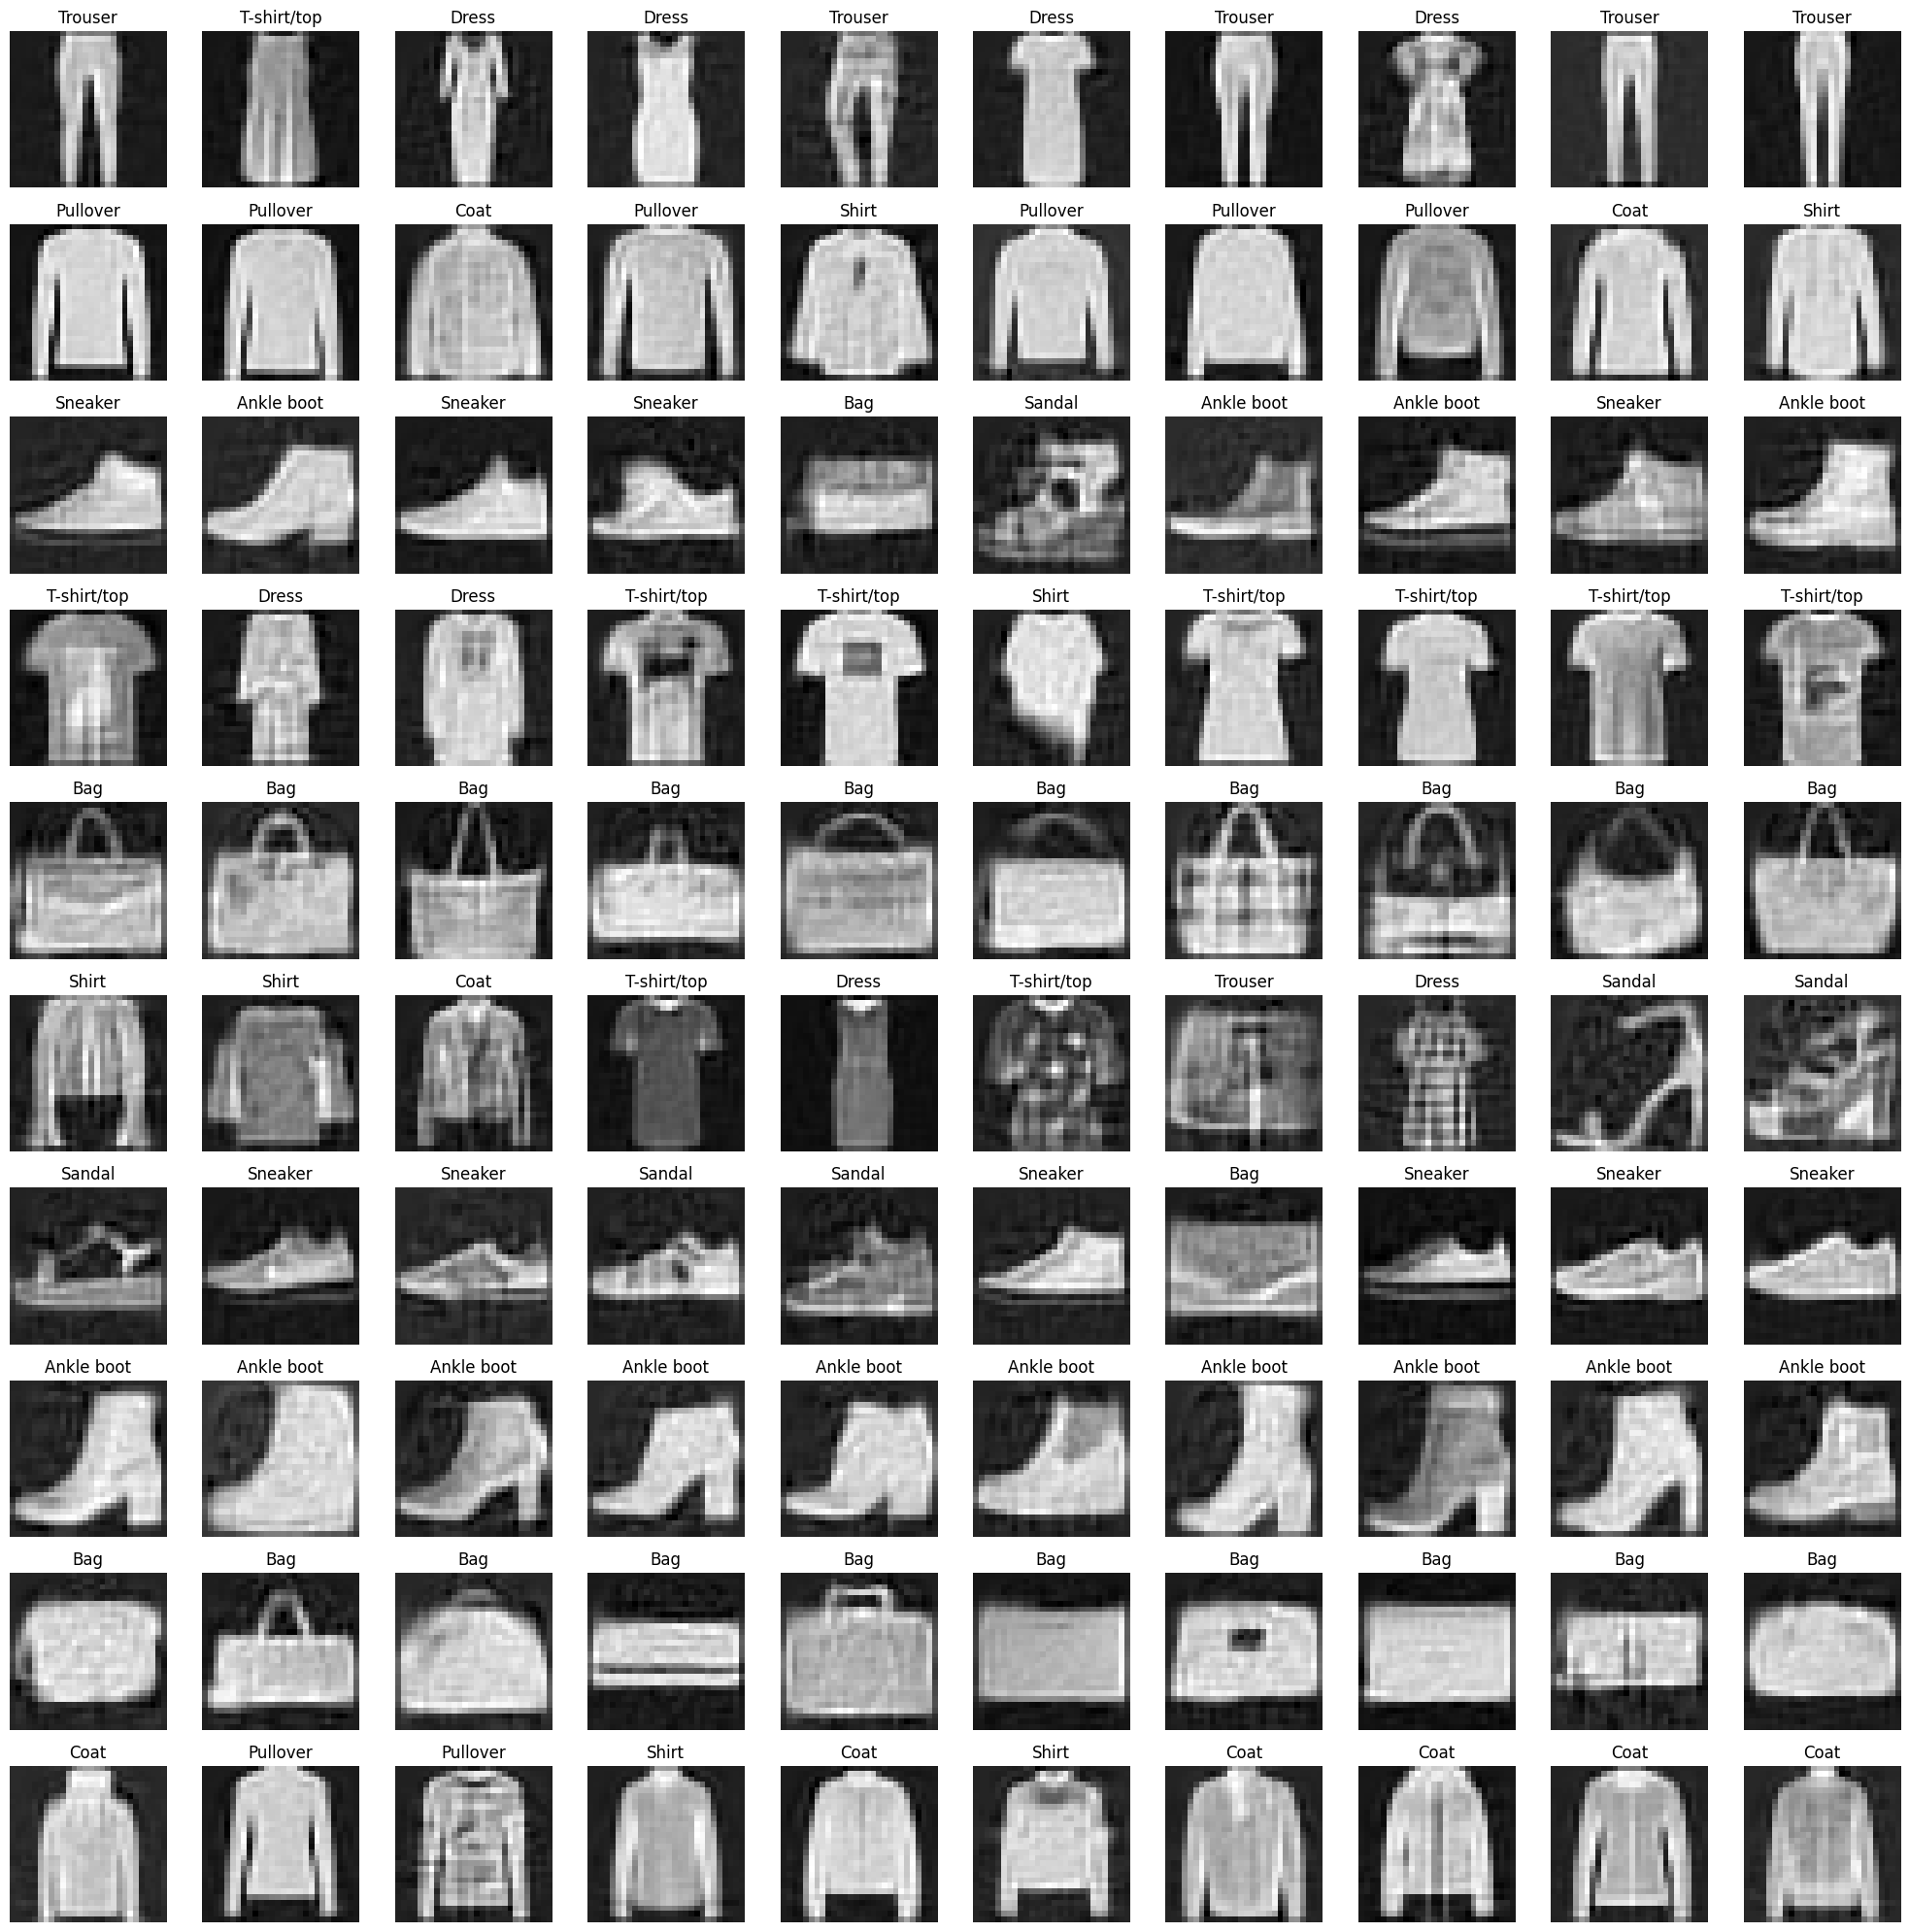

In [55]:
fig = plt.figure(figsize=(20,20))

for i in range(10):
    i_labelled_imgs = pca.inverse_transform(x_val_pca[y_val_pred == i][:10])
    true_labels = y_val[y_val_pred == i][:10]

    for j in range(10):
        plt.subplot(10,10, i*10 + j + 1)
        plt.imshow(i_labelled_imgs[j].reshape(28,28), cmap='gray')
        plt.title(labels[true_labels.iloc[j]])
        plt.axis('off')

plt.tight_layout()
plt.show()

#### From the above cluster visualization, we can see that all the clusters have similar clothing items with few discrepancies.

## Gaussian Mixture Model Clustering

In [56]:
gm_models = [GaussianMixture(n_components=i, n_init=1, random_state=4200).fit(x_rand_pca) for i in k]
aic = [gm.aic(x_rand_pca) for gm in gm_models]
bic = [gm.bic(x_rand_pca) for gm in gm_models]

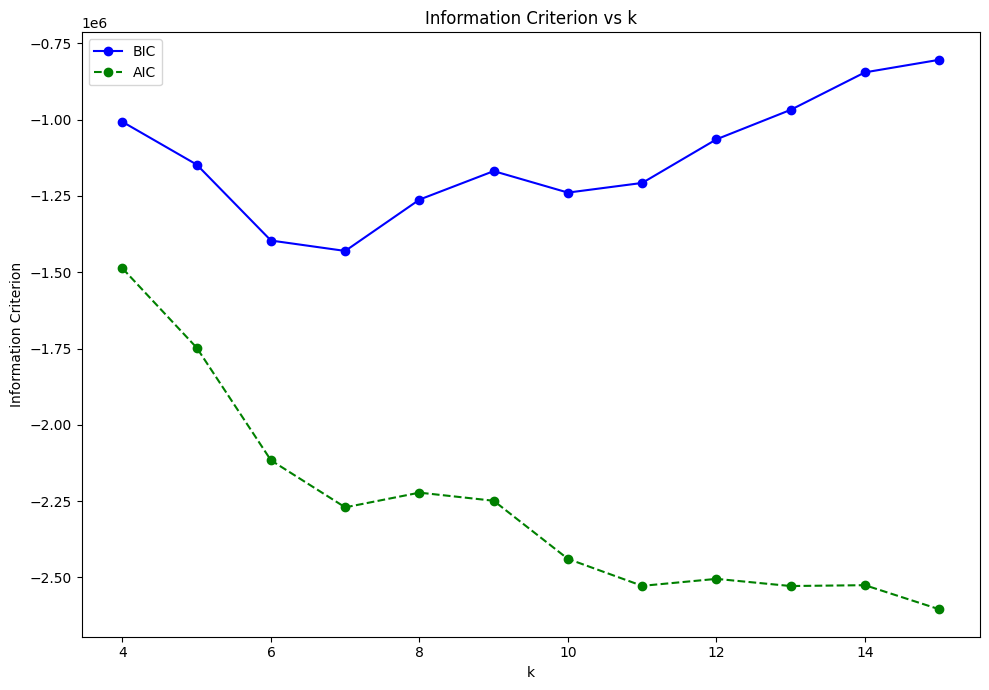

In [57]:
fig = plt.figure(figsize=(10,7))
plt.plot(k, bic, 'bo-', label='BIC')
plt.plot(k, aic, 'go--', label='AIC')
plt.title('Information Criterion vs k')
plt.xlabel('k')
plt.ylabel('Information Criterion')
plt.legend()
plt.tight_layout()
plt.show()

#### From the above plot, we can see that for k = 10, the combination of BIC and AIC is low as compared to other values of k that have either high BIC or high AIC. So, we select k = 10 here.

In [58]:
gm = gm_models[6]
y_val_pred = gm.predict(x_val_pca)

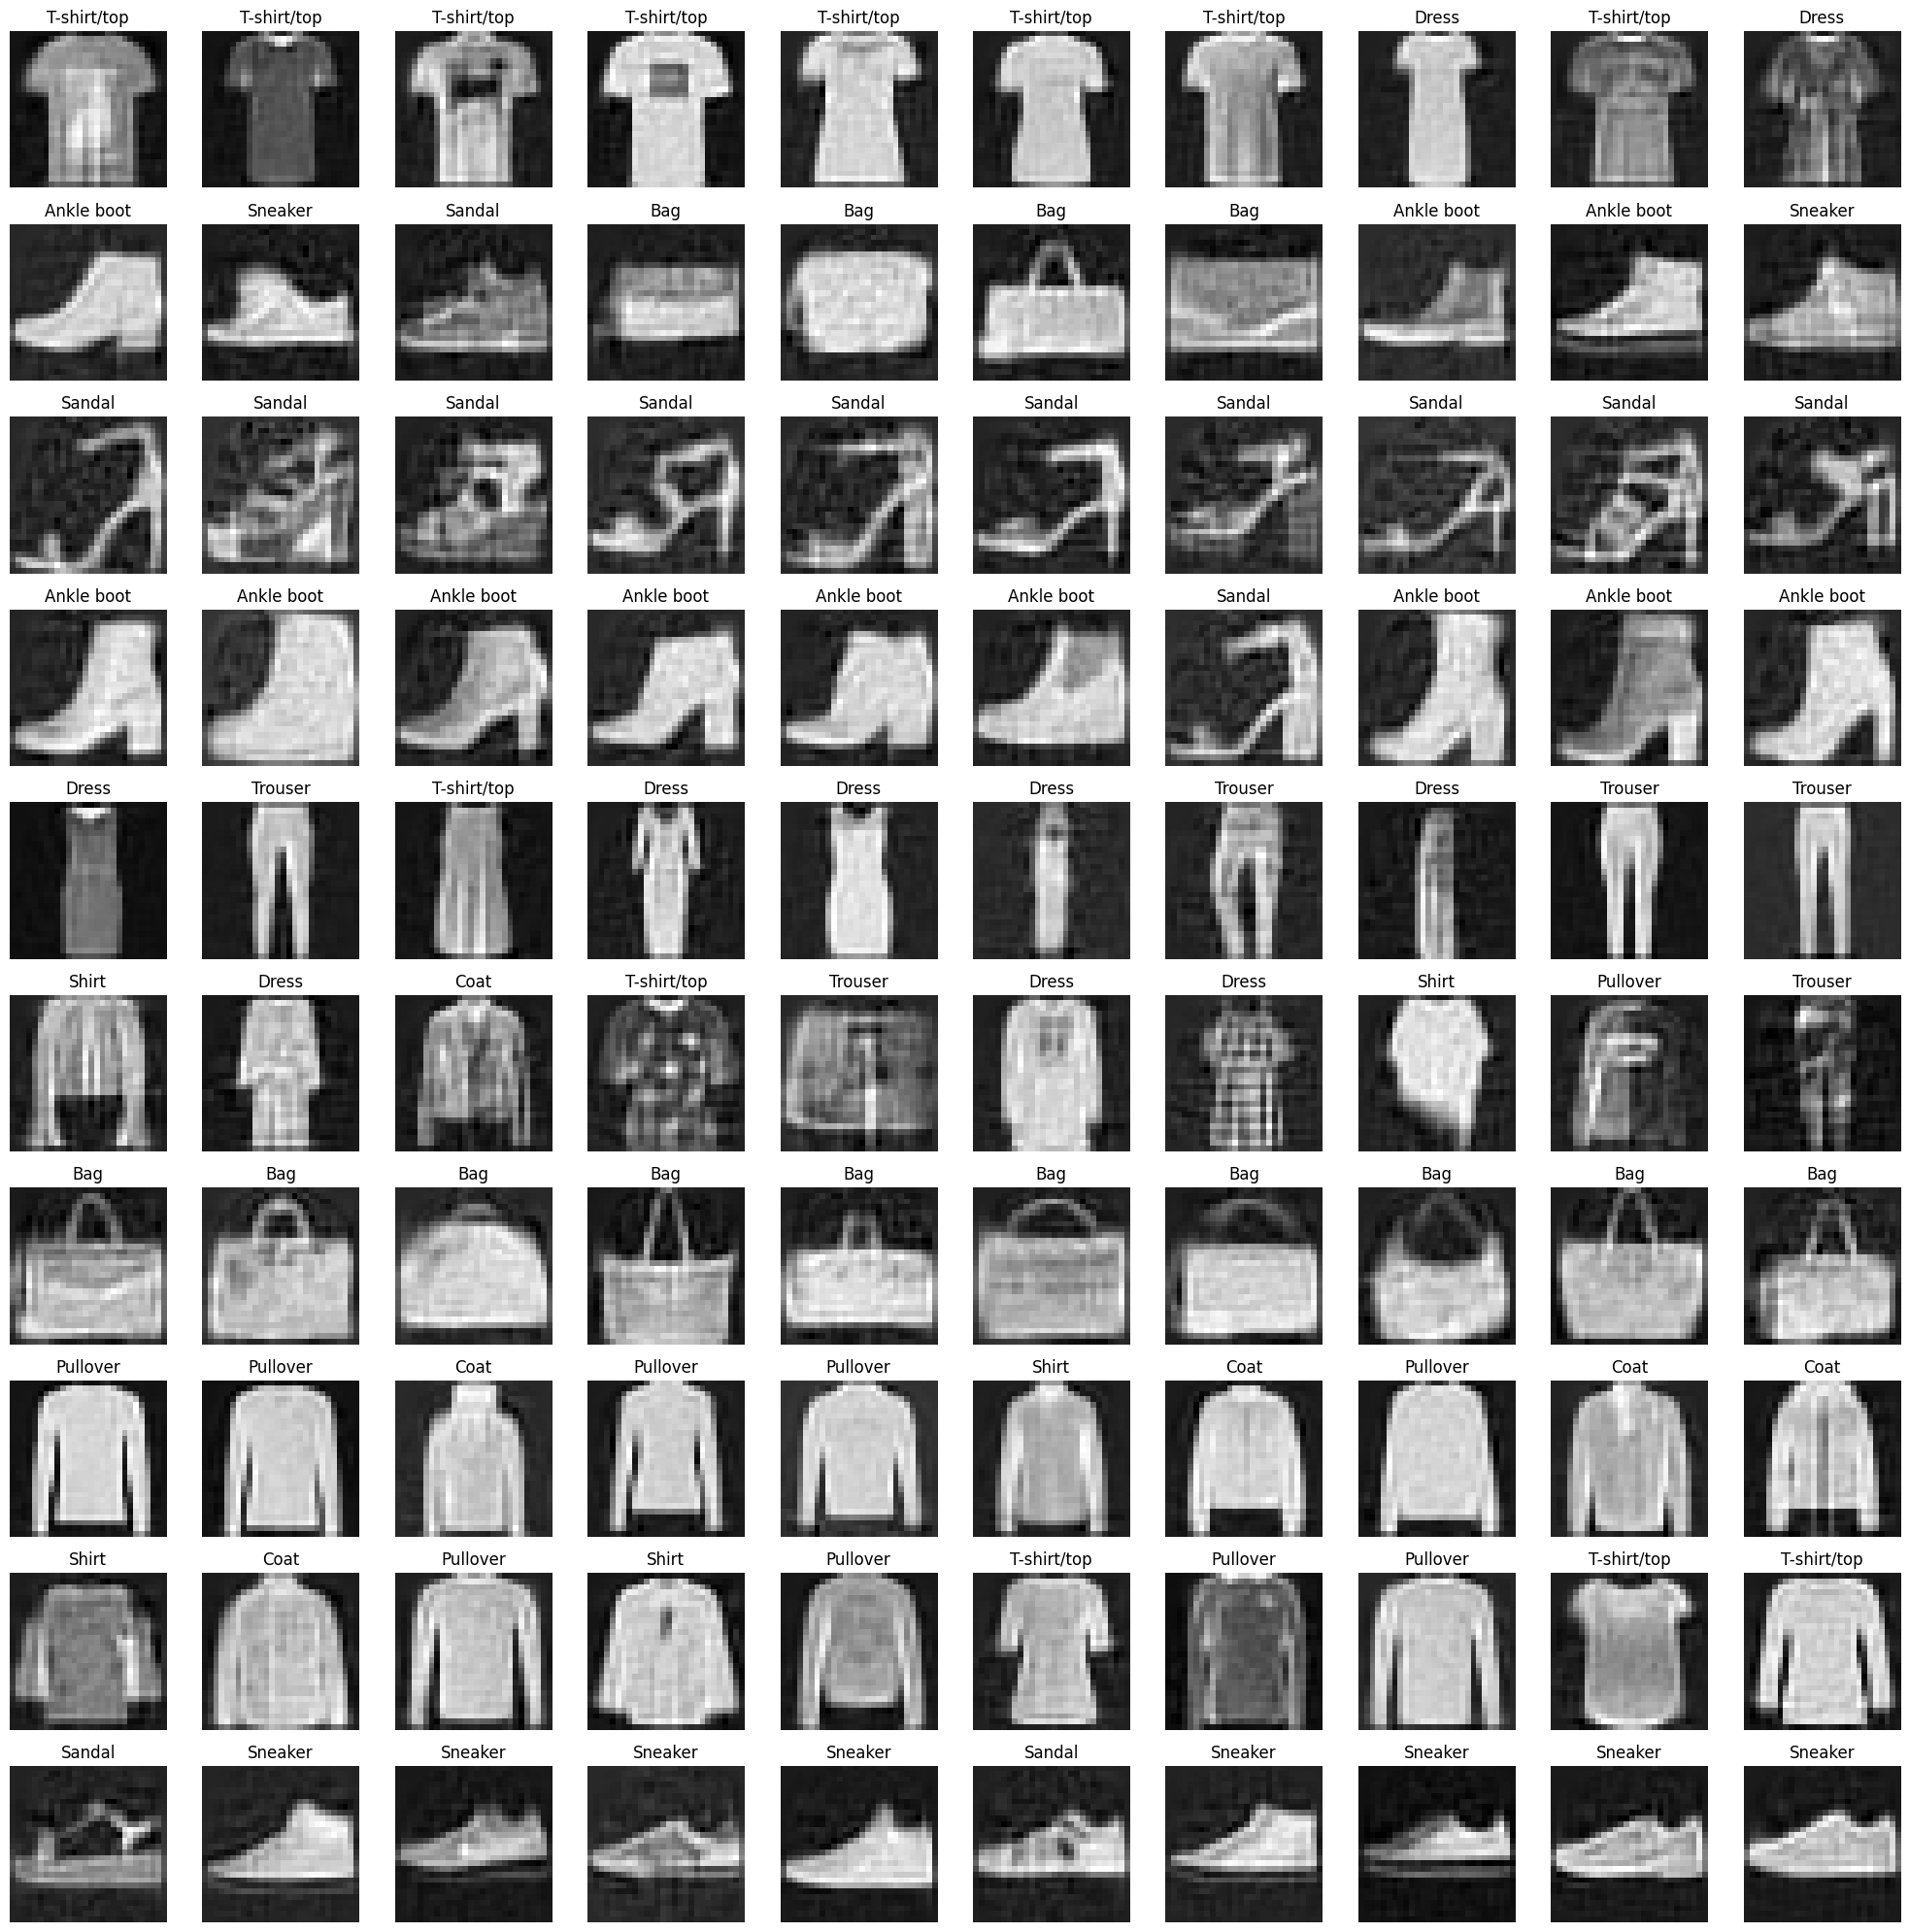

In [59]:
fig = plt.figure(figsize=(20,20))

for i in range(10):
    i_labelled_imgs = pca.inverse_transform(x_val_pca[y_val_pred == i][:10])
    true_labels = y_val[y_val_pred == i][:10]

    for j in range(10):
        plt.subplot(10,10, i*10 + j + 1)
        plt.imshow(i_labelled_imgs[j].reshape(28,28), cmap='gray')
        plt.title(labels[true_labels.iloc[j]])
        plt.axis('off')

plt.tight_layout()
plt.show()

#### From the above cluster visualization, we can see that all the clusters have similar clothing items with few discrepancies.

In [60]:
x_gen, y_gen = gm.sample(20)

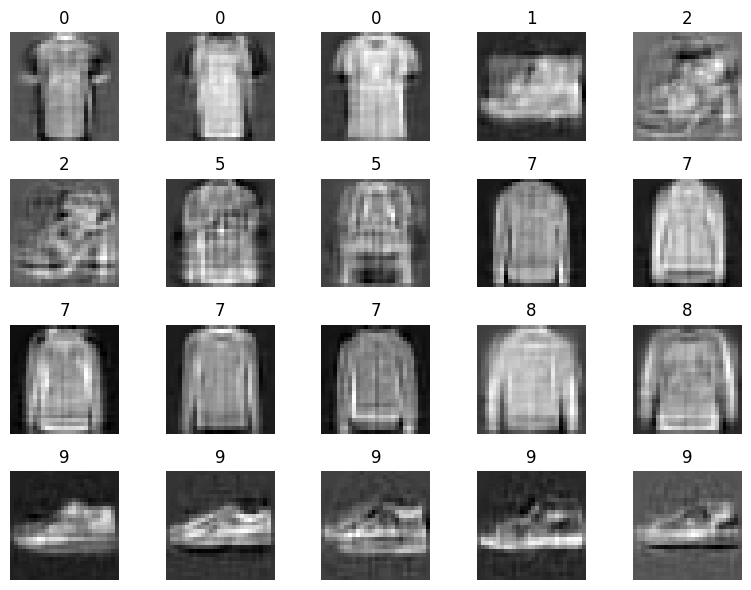

In [61]:
fig = plt.figure(figsize=(8,6))

for i in range(20):
    img = pca.inverse_transform(x_gen[i]).reshape(28,28)
    plt.subplot(4,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(y_gen[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### From the above visualization, we can see that the generated images look close to the clothing items.
- For example, 0 resembles t-shirt, 2 resembles sandal, 7 resembles shirt or pullover and 9 resembles sneakers.